In [2]:
# Modelo Deep Learning que determina si una crítica cinematográfica es positiva o negativa
# Dataset: keras.IMDB

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from keras.datasets import imdb

print("Cargando keras.IMDB")
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("Hecho")

Cargando keras.IMDB
Hecho


In [3]:
# Vectorizar los datos
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
# Vectorizar las etiquetas
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
# Divido las muestras y etiquetas de training en dos grupos
# 1 - 10.000     : x_val, y_val: 
# 10.000 - 25.000: partial_x_train, partial_y_train

# Muestras 0 - 10,000 de training -> Muestras de validación del entrenamiento
x_val = x_train[:10000]

# Muestras 10,000 - 25.000 de training -> Muestras de entrenamiento
partial_x_train = x_train[10000:]

# Etiquetas 0 - 10.000 de training -> Etiquetas de validación del entrenamiento
y_val = y_train[:10000]

# Etiquetas 10.000 - 25.000 de training -> Etiquetas de entrenamiento
partial_y_train = y_train[10000:]

In [6]:
# Definición del modelo
# Sequential model, the simplest type of Keras model
model = models.Sequential()

# Input_shape=10000: Especifica que cada muestra tiene 10000 características (1D array)
model.add(layers.Input(shape=(10000,)))

# Core of the model: 3 Dense layers

# units=16: This specifies there are 16 neurons in this layer
# Activation function for the neuron: 'relu'
model.add(layers.Dense(16, activation='relu'))

# units=16: This specifies there are 16 neurons in this layer
# Activation function for the neuron: 'relu'
model.add(layers.Dense(16, activation='relu'))

# units=1: This specifies there is 1 neuros in this layer
# Activation function for the neuron: 'sigmoid'
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

2025-12-30 20:58:04.026214: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2025-12-30 20:58:04.026547: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-12-30 20:58:04.026556: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-12-30 20:58:04.026851: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-30 20:58:04.026865: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
print("Entrenamiento del modelo")
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Entrenamiento del modelo
Epoch 1/20


2025-12-30 20:58:06.051362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.7681 - loss: 0.5310 - val_accuracy: 0.8653 - val_loss: 0.4018
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8926 - loss: 0.3289 - val_accuracy: 0.8860 - val_loss: 0.3107
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9186 - loss: 0.2432 - val_accuracy: 0.8882 - val_loss: 0.2806
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9335 - loss: 0.1961 - val_accuracy: 0.8841 - val_loss: 0.2830
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9448 - loss: 0.1630 - val_accuracy: 0.8874 - val_loss: 0.2758
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9539 - loss: 0.1412 - val_accuracy: 0.8868 - val_loss: 0.2834
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9608 - loss: 0.1209 - val_accuracy: 0.8862 - val_loss: 0.2964
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9701 - loss: 0.1011 - val_accuracy: 0.8837 - val_loss: 0.

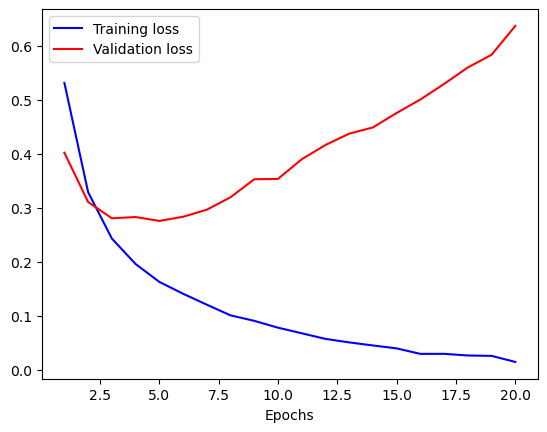

In [14]:
# Gráfica del resultado de la función de pérdida en los datos de entrenamiento y validación del entrenamiento
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, color='blue', label='Training loss')
plt.plot(epochs, val_loss_values, color='red', label='Validation loss')
plt.xlabel('Epochs')

plt.legend()
plt.show()